# House Price Prediction

## Table of Contents:

* **Importing the Datasets**

* **Exploratory Data Analysis(EDA)**
        * Correlation Ananlysis
        * Bivariate Analysis: 
            * Relationship between Categorical variables and target Variable 
            * Plots between numerical variables that are highly correlated with target Variable and the target variable
            * Outliers Treatment
        * Univariate Analysis
  
* **Feature Engineering**
        * numerical to categorical
        * Imputation of missing values   Label Encoding
        * Creation of New Variables
        * Kmeans Clustering for creating feature
        * Treating columns with high skewness
        * Label and one hot encoding for categorical variables
 
* **Model Building**
        * Hyperparameter tuning of different models
        * Stacking the models for better output
    
    
* **Submitting the predictions**
    
 
 

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.metrics import r2_score,mean_squared_log_error
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression
from sklearn.cluster import KMeans
from scipy.stats import norm
from scipy.stats import probplot
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [2]:
df_train=pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
df_test=pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent], axis=1, keys=['Total','Percent'])
missing_data.head(20)


,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


We will drop the top 5 columns as they have a lot of null values and for the rest of the features we will impute the values.

In [7]:
df_train.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1,inplace=True)
df_test.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1,inplace=True)

# EDA

## Correlation Analysis


<AxesSubplot:>

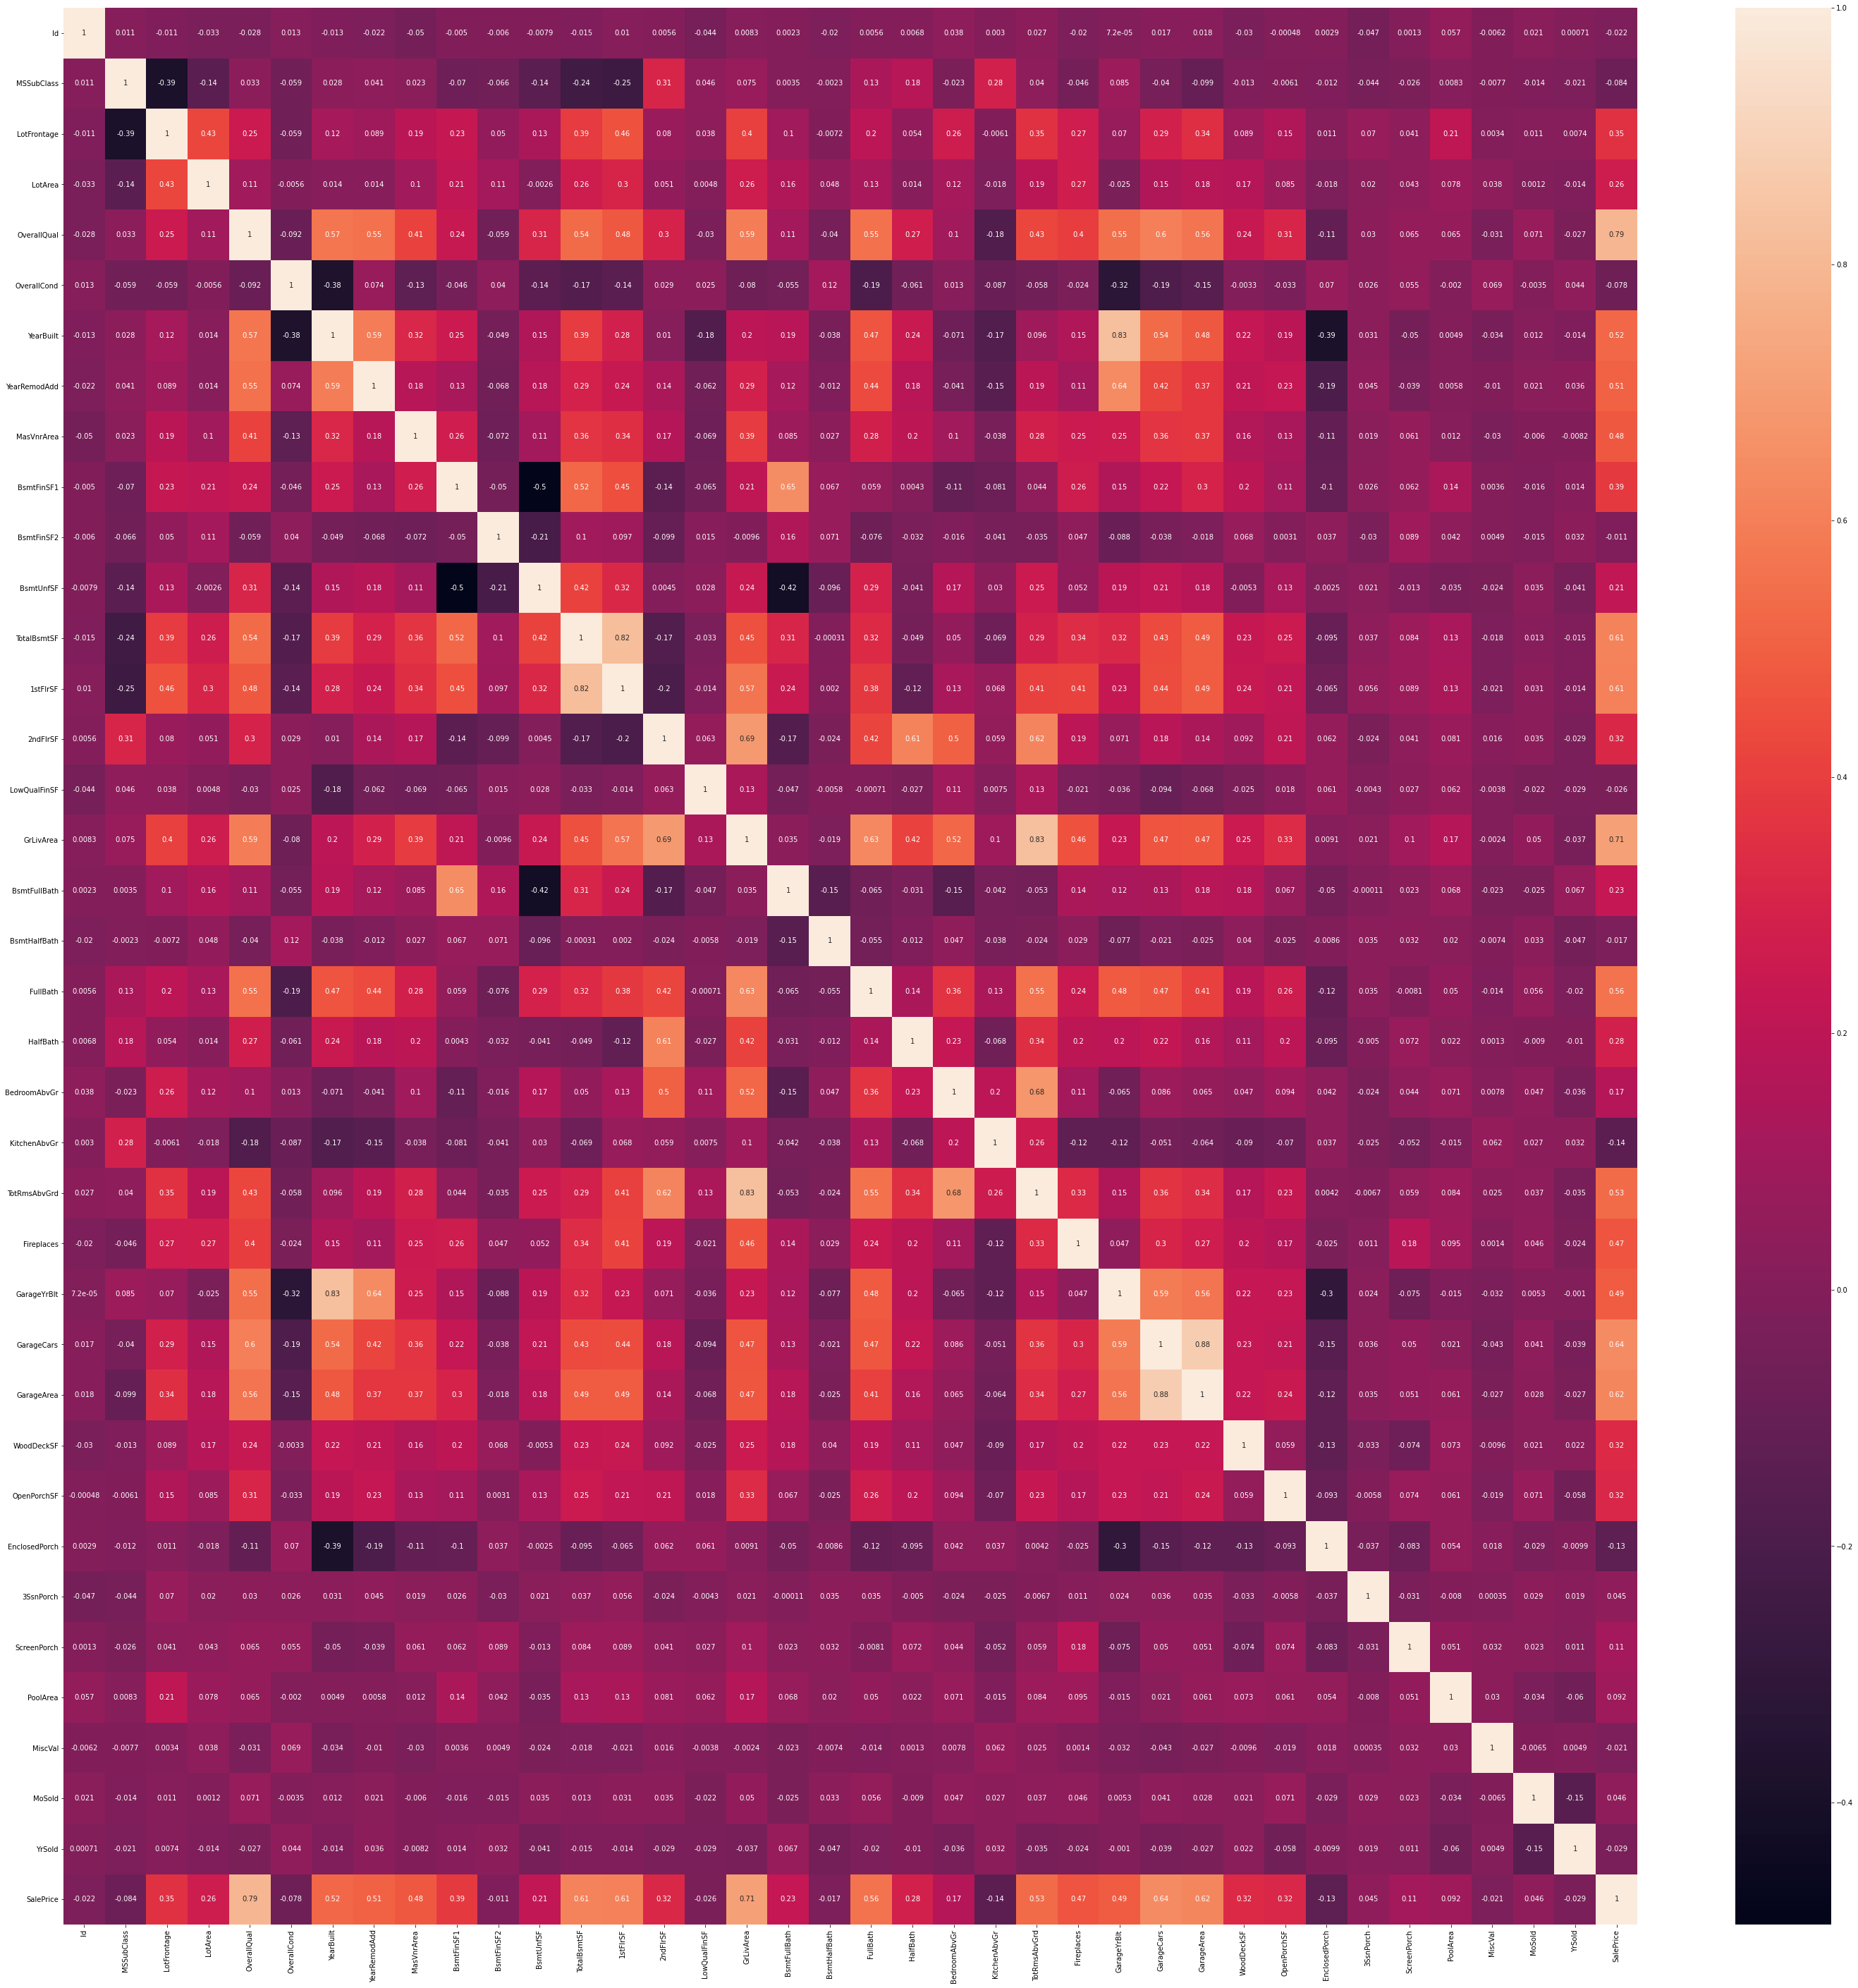

In [8]:
plt.figure(figsize=(50,50))
sns.heatmap(df_train.corr(),annot=True)

### Insights from the correlation heatmap:
* OverallQual,GrLivArea have strong correlation with SalePrice
* GarageArea and GarageCars have high correlation so we will use only one of them
* GrLivArea and TotRmsAbvGrd are also highly correlated so we will use GrLivArea only
* YearBuilt and GarageYrBlt are also highly correlated so we will use only YearBuilt

**MSSubClass and OverallCond are need to be converted to categorical columns


The numerical variables that are having very low correlation with the SalePrice should be dropped as they do not contribute in the prediction but will rather deteriorate the model performance


In [9]:
df_train.drop(['GarageArea','GarageYrBlt','BsmtFinSF2','BsmtUnfSF','LowQualFinSF','BedroomAbvGr','PoolArea'],axis=1,inplace=True)
df_test.drop(['GarageArea','GarageYrBlt','BsmtFinSF2','BsmtUnfSF','LowQualFinSF','BedroomAbvGr','PoolArea'],axis=1,inplace=True)

### Lets consider the columns that have high correlation with SalePrice and see the correlation among themselves and with the SalePrice

<AxesSubplot:>

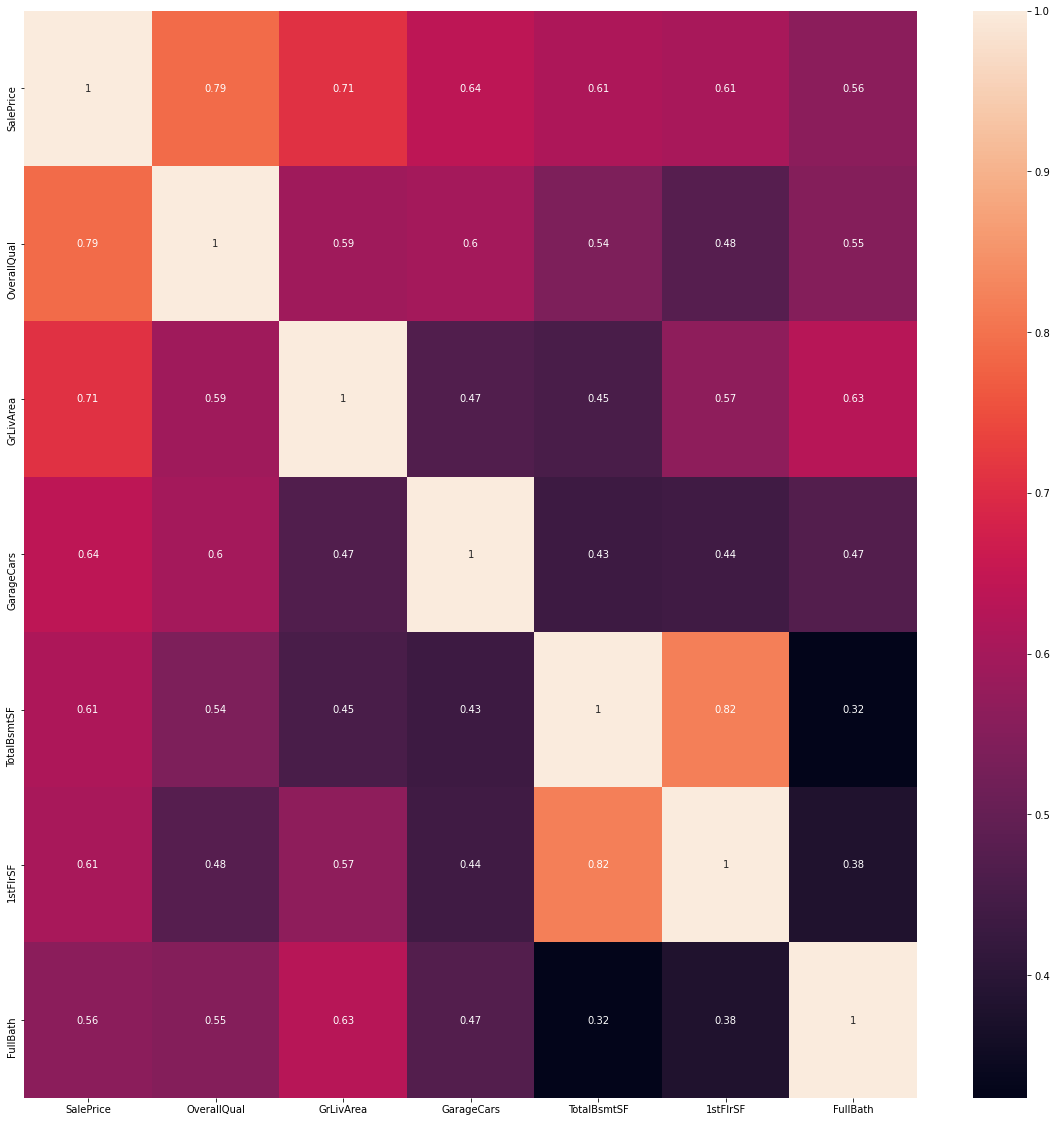

In [10]:
corrmat=df_train.corr()
cols = corrmat.nlargest(7, 'SalePrice')['SalePrice'].index   # nlargest : pick the most powerfull correlation
plt.figure(figsize=(20,20))
sns.heatmap(df_train[cols].corr(),annot=True)

*  There is a high correlation among TotalBsmtSF and 1st flrSF. Instead of dropping any one of them we can create a new variable TotalSF by adding TotalBsmtSF, 1stFlrSF and 2ndFlrSF

## Relationship of Categorical variables with SalePrice

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


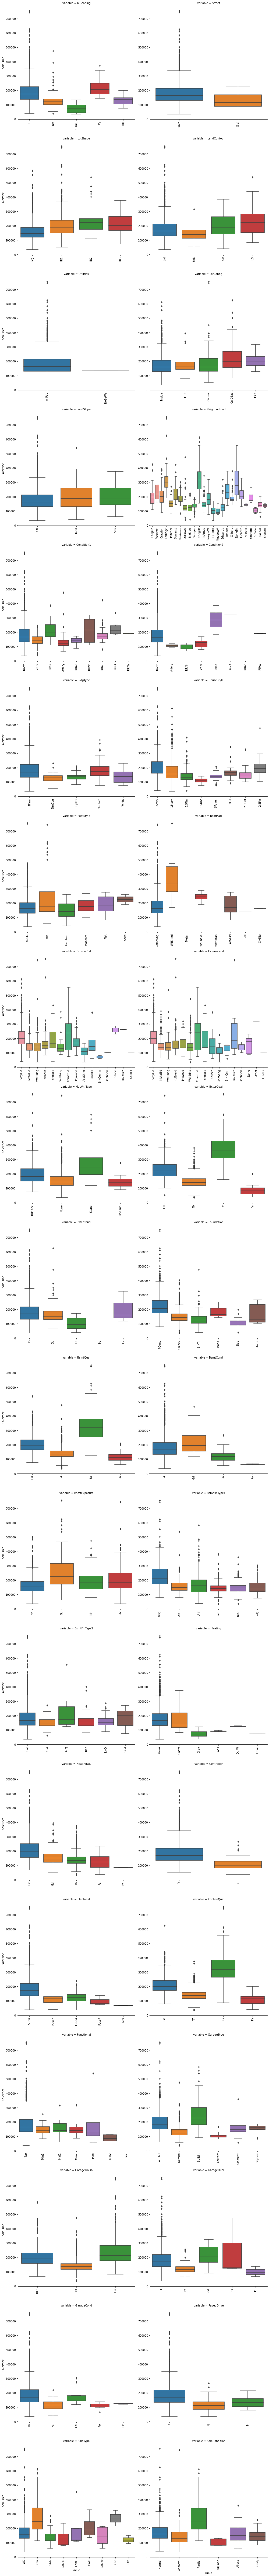

In [11]:
cat_cols=[col for col in df_train.columns if df_train[col].dtype=='object']

def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(df_train, id_vars=['SalePrice'], value_vars=cat_cols)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=7)
g = g.map(boxplot, "value", "SalePrice")

# Key Insights from the boxplots
* Utilities the variance is too low hence needs to be dropped
* In Garage Condition vs SalePrice plot the mean price of average garage conditioned houses is more than the mean prices of good conditioned garage and excellent conditioned garage houses. Hence this column shoul be dropped
* Prices vary greatly depending on the neighborhood.
* In Heating feature the variance is very low that needs to be taken care off.


In [12]:
df_train.drop(['Street','Utilities','Condition2','RoofMatl','Heating','GarageCond'],axis=1,inplace=True)
df_test.drop(['Street','Utilities','Condition2','RoofMatl','Heating','GarageCond'],axis=1,inplace=True)

# Plots to show relation among numerical features that have high correlation with SalePrice

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


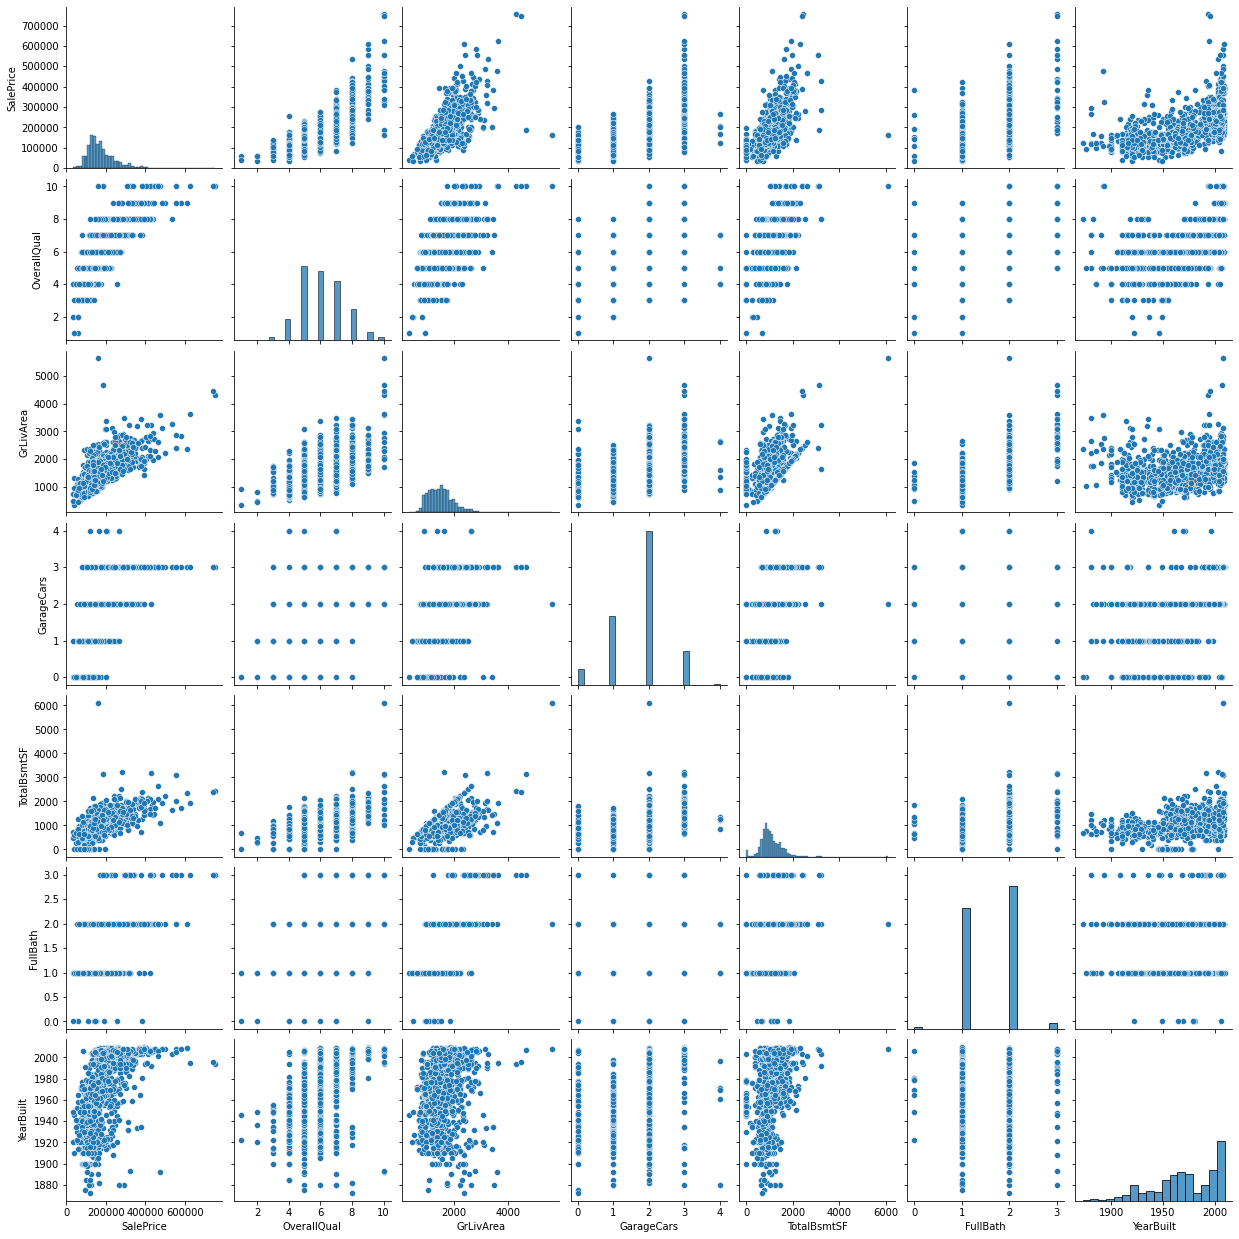

In [13]:
high_corr_columns = ['SalePrice','OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','YearBuilt']
sns.pairplot(df_train[high_corr_columns],size=2.5)
plt.show();

There are a few outliers in SalePrice v/s GrLivArea and Saleprice v/s TotalBsmtSF. We will remove these outliers
* In GrLivArea v/s SalePrice there are 4 outliers as we can see from the graph(2 of them have SalePrice>700000 and also all four of them have GrLivArea>4000


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

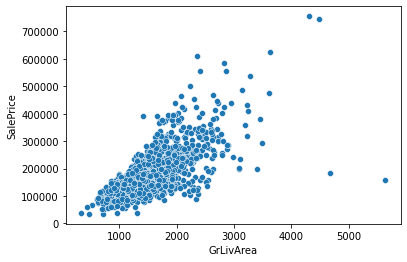

In [14]:
sns.scatterplot(df_train['GrLivArea'],df_train['SalePrice'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

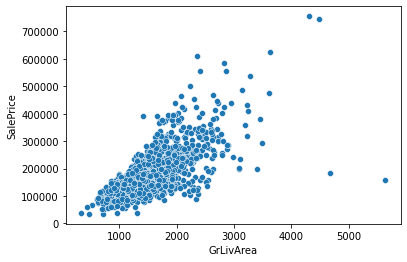

In [15]:
sns.scatterplot(df_train['GrLivArea'],df_train['SalePrice'])

We have successfully removed outliers for GrLivArea

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

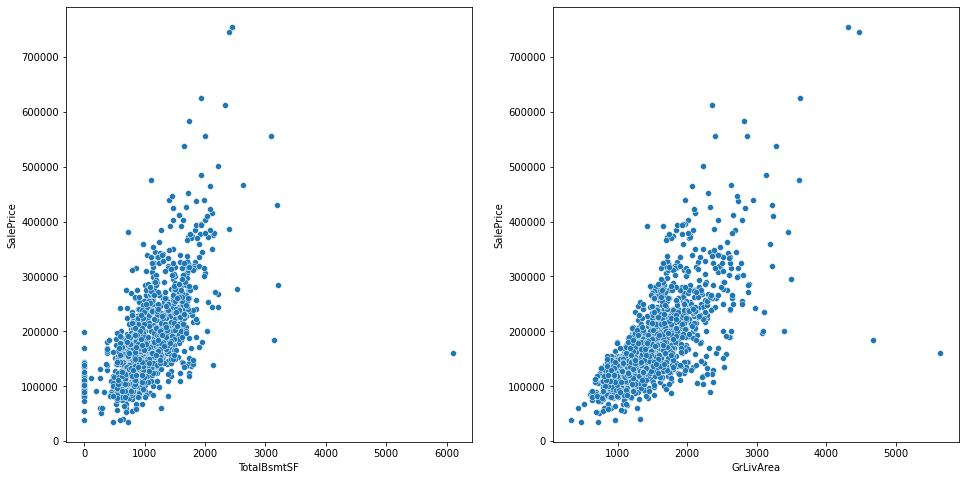

In [16]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.scatterplot(df_train['TotalBsmtSF'],df_train['SalePrice'])
plt.subplot(1,2,2)
sns.scatterplot(df_train['GrLivArea'],df_train['SalePrice'])

* **There are some extreme outliers we will take care of them after doing feature engineering**

# Univariate Analysis

## Target Distribution

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000])),
 (74160.16474519414, 180921.19589041095, 0.9319665641512983))

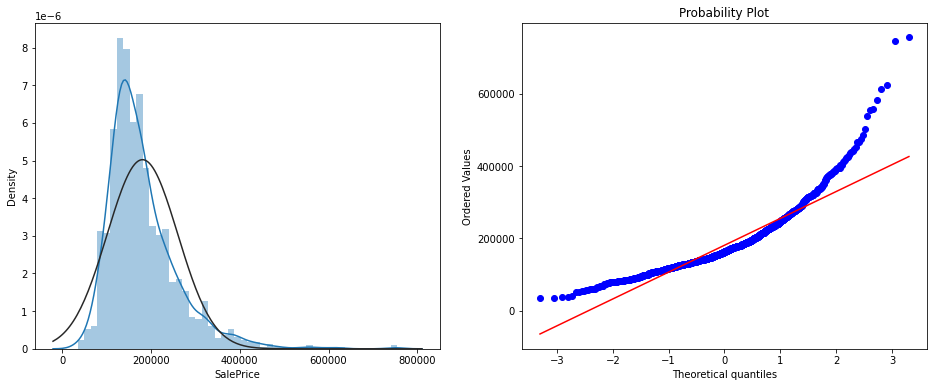

In [17]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.distplot(df_train['SalePrice'],fit=norm)
plt.subplot(1,2,2)
probplot(df_train['SalePrice'],plot=plt)


* We can see from the above graphs that our target variable is not normally distributed. Hence we will need to normalize the target variable

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([10.46024211, 10.47194981, 10.54270639, ..., 13.34550693,
         13.5211395 , 13.53447303])),
 (0.3982622308161888, 12.024050901109383, 0.9953761475636613))

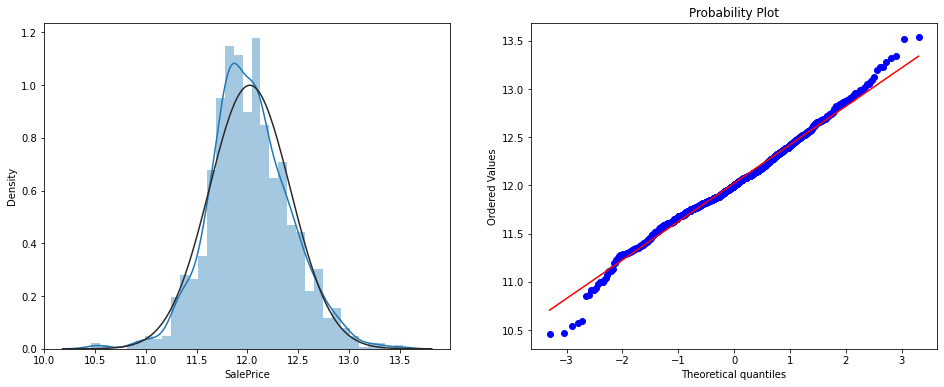

In [18]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.distplot(np.log(df_train['SalePrice']),fit=norm)
plt.subplot(1,2,2)
probplot(np.log(df_train['SalePrice']),plot=plt)

* After log transformation the target variable seems normally distributed

# Feature Engineering

In [19]:
# Converting non-numeric predictors stored as numbers into string

df_train['MSSubClass'] = df_train['MSSubClass'].apply(str)
df_train['YrSold'] = df_train['YrSold'].apply(str)
df_train['MoSold'] = df_train['MoSold'].apply(str)

df_test['MSSubClass'] = df_test['MSSubClass'].apply(str)
df_test['YrSold'] = df_test['YrSold'].apply(str)
df_test['MoSold'] = df_test['MoSold'].apply(str)

## Missing Value Treatment

In [20]:
categorical_cols=[cols for cols in df_train.columns if df_train[cols].dtype=='O']
numerical_cols=[cols for cols in df_train.drop("SalePrice",axis=1).columns if df_train[cols].dtype!='O']

In [21]:
# Checking for missing values in training dataset
mis_col_train=df_train.columns[df_train.isnull().sum()>0]
for col in mis_col_train:
    print(col,df_train[col].isnull().sum())

LotFrontage 259
MasVnrType 8
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
GarageType 81
GarageFinish 81
GarageQual 81


In [22]:
# Checking for missing values in test dataset
mis_col=df_test.columns[df_test.isnull().sum()>0]
for col in mis_col:
    print(col,df_test[col].isnull().sum())

MSZoning 4
LotFrontage 227
Exterior1st 1
Exterior2nd 1
MasVnrType 16
MasVnrArea 15
BsmtQual 44
BsmtCond 45
BsmtExposure 44
BsmtFinType1 42
BsmtFinSF1 1
BsmtFinType2 42
TotalBsmtSF 1
BsmtFullBath 2
BsmtHalfBath 2
KitchenQual 1
Functional 2
GarageType 76
GarageFinish 78
GarageCars 1
GarageQual 78
SaleType 1


* Missing values in GarageX variables indicate no garage hence we will impute them with none for categorical and 0 for numerical
* Missing values in BasementX variables indicate no Basement hence here also we will impute them with none for categorical and 0 for numerical
* Missing values in LotFrontage can be imputed based on the Neighborhood
* The missing values in other columns dont refer to absense of anything per se hence they can be imputed with mean and median for numerical and categorical values respectively


In [23]:

df_train['Electrical'].fillna(df_train['Electrical'].mode()[0],inplace=True)
df_train['MasVnrType'].fillna('None',inplace=True)
df_train['MasVnrArea'].fillna(0,inplace=True)


In [24]:
df_test['SaleType'].fillna(df_test['SaleType'].mode()[0],inplace=True)
df_test['Functional'].fillna(df_test['Functional'].mode()[0],inplace=True)
df_test['KitchenQual'].fillna(df_test['KitchenQual'].mode()[0],inplace=True)
df_test['BsmtHalfBath'].fillna(df_test['BsmtHalfBath'].mode()[0],inplace=True)
df_test['BsmtFullBath'].fillna(df_test['BsmtFullBath'].mode()[0],inplace=True)
df_test['TotalBsmtSF'].fillna(df_test['TotalBsmtSF'].mean(),inplace=True)
df_test['BsmtFinSF1'].fillna(df_test['BsmtFinSF1'].mean(),inplace=True)
df_test['MSZoning'].fillna(df_test['MSZoning'].mode()[0],inplace=True)
df_test['Exterior1st'].fillna(df_test['Exterior1st'].mode()[0],inplace=True)
df_test['Exterior2nd'].fillna(df_test['Exterior2nd'].mode()[0],inplace=True)
df_test['MasVnrArea'].fillna(0,inplace=True)
df_test['MasVnrType'].fillna('None',inplace=True)


In [25]:
piv_table=pd.DataFrame()
piv_table=pd.pivot_table(df_train,index=['Neighborhood'],values=['LotArea'],aggfunc='mean',fill_value=11)
piv_table

cm = sns.light_palette("red", as_cmap=True)
piv_table.style.background_gradient(cmap='viridis')

,LotArea
Neighborhood,
Blmngtn,3398.176471
Blueste,1625.000000
BrDale,1801.000000
BrkSide,7360.413793
ClearCr,30875.750000
CollgCr,9619.146667
Crawfor,11809.686275
Edwards,10218.650000
Gilbert,11379.151899


In [26]:
# We can see from the pivot table that the Lot Area varies with Neighborhood
df_train['LotFrontage'] = df_train.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
df_test['LotFrontage'] = df_test.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

*The Remaining columns are to be imputed with 0 and none*

In [27]:
# Imputing categorical columns with None and numerical columns with 0 for train set
for col in categorical_cols:
    df_train[col].fillna(df_train[col].mode()[0],inplace=True)
    

for col in numerical_cols:
    df_train[col].fillna(df_train[col].mean(),inplace=True)
    
# Imputing categorical columns with None and numerical columns with 0 for test set
for col in categorical_cols:
    df_test[col].fillna("None",inplace=True)
    

for col in numerical_cols:
    df_test[col].fillna(0,inplace=True)
    

# Creation of new variables

* We could create a variable called TotalSF which would be sum of TotalBsmtSF, 1stFlrSF and 2ndFlrSF. Intuitivley this variable is most likely to have good correlation with the 3 variables hence we will drop the 3 variables.
* Another variable that could be created would be related to bath where we would include fullbath,halfbath and Bsmtfullbath and use that one variable except the rest.
* Spaciousness of a house does play a role in deciding the price of the house. It makes sense that no one would buy a house for a greater price if the rooms are small.
* Total number of porches can be useful instead of the porch areas which seem to have low correlation with the SalePrice.
* A house with 2 floors **generally** has higher price compared to a house with only one floor .
* Whether a house has Garage and basement could also have an effect on the price of the house

In [28]:
df_train["LivLotRatio"] = df_train['GrLivArea'] / df_train['LotArea']
df_train["Spaciousness"] = (df_train['1stFlrSF'] + df_train['2ndFlrSF']) / df_train['TotRmsAbvGrd']
df_train["PorchTypes"] = df_train[["WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch"]].gt(0.0).sum(axis=1)
df_train['TotalSF']=df_train["1stFlrSF"]+df_train["2ndFlrSF"]+df_train["TotalBsmtSF"]
df_train['Bath']=df_train['FullBath']+df_train['BsmtFullBath']+0.5*df_train['HalfBath']+0.5*df_train['BsmtHalfBath']
df_train['has2ndfloor'] = df_train['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
df_train['hasgarage'] = df_train['GarageCars'].apply(lambda x: 1 if x > 0 else 0)
df_train['hasbsmt'] = df_train['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
df_train["SqFtPerRoom"] = df_train["GrLivArea"] / (df_train["TotRmsAbvGrd"] +
                                                       df_train["FullBath"] +
                                                       df_train["HalfBath"] +
                                                       df_train["KitchenAbvGr"])



df_test["LivLotRatio"] = df_test['GrLivArea'] / df_test['LotArea']
df_test["Spaciousness"] = (df_test['1stFlrSF'] + df_test['2ndFlrSF']) / df_test['TotRmsAbvGrd']
df_test["PorchTypes"] = df_test[["WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch"]].gt(0.0).sum(axis=1)
df_test['TotalSF']=df_test["1stFlrSF"]+df_test["2ndFlrSF"]+df_test["TotalBsmtSF"]
df_test['Bath']=df_test['FullBath']+df_test['BsmtFullBath']+0.5*df_test['HalfBath']+0.5*df_test['BsmtHalfBath']
df_test['has2ndfloor'] = df_test['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
df_test['hasgarage'] = df_test['GarageCars'].apply(lambda x: 1 if x > 0 else 0)
df_test['hasbsmt'] = df_test['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
df_test["SqFtPerRoom"] = df_test["GrLivArea"] / (df_test["TotRmsAbvGrd"] +
                                                       df_test["FullBath"] +
                                                       df_test["HalfBath"] +
                                                       df_test["KitchenAbvGr"])


* Clustering features to generate a new feature would be useful. The houses with similar Bsmt,1st floor and 2nd floor would mostly have similar prices, Hence it would make sense to group these features


In [29]:
cluster_features = [
    "LotArea",
    "TotalBsmtSF",
    "1stFlrSF",
    "2ndFlrSF",
    "GrLivArea",
]


def cluster_labels(df, features, n_clusters=20):
    X = df.copy()
    X_scaled = X.loc[:, features]
    X_scaled = (X_scaled - X_scaled.mean(axis=0)) / X_scaled.std(axis=0)
    kmeans = KMeans(n_clusters=n_clusters, n_init=50, random_state=0)
    X_new = pd.DataFrame()
    X_new["Cluster"] = kmeans.fit_predict(X_scaled)
    return X_new


df_train['Cluster']=cluster_labels(df_train,cluster_features)
df_test['Cluster']=cluster_labels(df_test,cluster_features)

In [30]:
# Dropping those extreme outliers
df_train.drop(df_train[df_train['GrLivArea']>4000].index,inplace=True)


In [31]:
df_train.drop(["WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","FullBath","HalfBath","BsmtFullBath","BsmtHalfBath",'MiscVal','1stFlrSF','2ndFlrSF','TotalBsmtSF','KitchenAbvGr','TotRmsAbvGrd'],axis=1,inplace=True)
df_test.drop(["WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","FullBath","HalfBath","BsmtFullBath","BsmtHalfBath",'MiscVal','1stFlrSF','2ndFlrSF','TotalBsmtSF','KitchenAbvGr','TotRmsAbvGrd'],axis=1,inplace=True)

In [32]:
skewness=pd.DataFrame(df_train.skew(),columns=["Skew"])
skewness.sort_values("Skew")

,Skew
hasbsmt,-6.037592
hasgarage,-3.881398
YearBuilt,-0.610087
YearRemodAdd,-0.499831
GarageCars,-0.343475
PorchTypes,-0.087356
Id,0.001342
YrSold,0.093214
OverallQual,0.183871
MoSold,0.217883


In [33]:
skewed_cols=[cols for cols in skewness.index if skewness.loc[cols,'Skew']>0.5]
skewed_cols.remove('MSSubClass')

In [34]:
df_train[skewed_cols].dtypes

LotFrontage     float64
LotArea           int64
OverallCond       int64
MasVnrArea      float64
BsmtFinSF1        int64
GrLivArea         int64
Fireplaces        int64
SalePrice         int64
LivLotRatio     float64
Spaciousness    float64
TotalSF           int64
SqFtPerRoom     float64
dtype: object

In [35]:
skewed_cols_test=[ 'LotFrontage',
 'LotArea',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'GrLivArea',
 'Fireplaces',
 'LivLotRatio',
 'Spaciousness',
 'TotalSF',
 'SqFtPerRoom']

In [36]:
for col in skewed_cols:
    df_train[col]=np.log1p(df_train[col])
    
for col in skewed_cols_test:
    df_test[col]=np.log1p(df_test[col])

## Label Encoding and One-Hot Encoding for categorical Variables


* *For Columns with high Cardinality ,i.e, many unique values one hot encoding would create too many variables it would be better to label encode them*
* *For columns with low cardinality one hot encoding is done*

In [37]:
df_full=pd.concat([df_train,df_test])
df_full

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,LivLotRatio,Spaciousness,PorchTypes,TotalSF,Bath,has2ndfloor,hasgarage,hasbsmt,SqFtPerRoom,Cluster
0,1,60,RL,4.189655,9.042040,Reg,Lvl,Inside,Gtl,CollgCr,...,0.184292,5.369475,1,7.850493,3.5,1,1,1,4.966335,17
1,2,20,RL,4.394449,9.169623,Reg,Lvl,FR2,Gtl,Veenker,...,0.123507,5.353437,1,7.833996,2.5,0,1,1,4.950335,12
2,3,60,RL,4.234107,9.328212,IR1,Lvl,Inside,Gtl,CollgCr,...,0.147347,5.699328,1,7.903596,3.5,1,1,1,5.190732,17
3,4,70,RL,4.110874,9.164401,IR1,Lvl,Corner,Gtl,Crawfor,...,0.165337,5.506492,2,7.813592,2.0,1,1,1,5.256337,4
4,5,60,RL,4.442651,9.565284,IR1,Lvl,FR2,Gtl,NoRidge,...,0.143353,5.502165,2,8.114923,3.5,1,1,1,5.136251,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,3.091042,7.568896,Reg,Lvl,Inside,Gtl,MeadowV,...,0.447278,5.390897,0,7.401842,1.5,1,0,1,4.923624,10
1455,2916,160,RM,3.091042,7.546974,Reg,Lvl,Inside,Gtl,MeadowV,...,0.455244,5.209486,1,7.401842,1.5,1,1,1,4.806750,10
1456,2917,20,RL,5.081404,9.903538,Reg,Lvl,Inside,Gtl,Mitchel,...,0.059400,5.169672,1,7.803435,2.0,0,1,1,4.919981,0
1457,2918,85,RL,4.143135,9.253591,Reg,Lvl,Inside,Gtl,Mitchel,...,0.088837,5.091703,2,7.540622,1.5,0,0,1,4.806068,3


In [38]:
high_cardinality=[]
low_cardinality=[]
for col in categorical_cols:
    print(col,":",df_full[col].nunique())
    if df_full[col].nunique()>10:
        high_cardinality.append(col)
    else:
        low_cardinality.append(col)
    

MSSubClass : 16
MSZoning : 5
LotShape : 4
LandContour : 4
LotConfig : 5
LandSlope : 3
Neighborhood : 25
Condition1 : 9
BldgType : 5
HouseStyle : 8
RoofStyle : 6
Exterior1st : 15
Exterior2nd : 16
MasVnrType : 4
ExterQual : 4
ExterCond : 5
Foundation : 6
BsmtQual : 5
BsmtCond : 5
BsmtExposure : 5
BsmtFinType1 : 7
BsmtFinType2 : 7
HeatingQC : 5
CentralAir : 2
Electrical : 5
KitchenQual : 4
Functional : 7
GarageType : 7
GarageFinish : 4
GarageQual : 6
PavedDrive : 3
MoSold : 12
YrSold : 5
SaleType : 9
SaleCondition : 6


In [39]:
le=LabelEncoder()
for col in high_cardinality:
    df_full[col]=le.fit_transform(df_full[col])

In [40]:
encoded_full=df_full
for col in low_cardinality:
    one_hot=pd.get_dummies(df_full[[col]],drop_first=True)
    encoded_full=pd.concat([encoded_full,one_hot],axis=1)
    
encoded_full.drop(low_cardinality,axis=1,inplace=True)


In [41]:
encoded_full

,Id,MSSubClass,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,10,4.189655,9.042040,5,7,1.791759,2003,2003,12,...,0,0,0,0,1,0,0,0,1,0
1,2,5,4.394449,9.169623,24,6,2.197225,1976,1976,8,...,0,0,0,0,1,0,0,0,1,0
2,3,10,4.234107,9.328212,5,7,1.791759,2001,2002,12,...,0,0,0,0,1,0,0,0,1,0
3,4,11,4.110874,9.164401,6,7,1.791759,1915,1970,13,...,0,0,0,0,1,0,0,0,0,0
4,5,10,4.442651,9.565284,15,8,1.791759,2000,2000,12,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,2,3.091042,7.568896,10,4,2.079442,1970,1970,5,...,0,0,0,0,1,0,0,0,1,0
1455,2916,2,3.091042,7.546974,10,4,1.791759,1970,1970,5,...,0,0,0,0,1,0,0,0,0,0
1456,2917,5,5.081404,9.903538,11,5,2.079442,1960,1996,12,...,0,0,0,0,1,0,0,0,0,0
1457,2918,14,4.143135,9.253591,11,5,1.791759,1992,1992,6,...,0,0,0,0,1,0,0,0,1,0


In [42]:
train_df=encoded_full.iloc[:1456,:]
test_df=encoded_full.iloc[1456:,:]

In [43]:
test_df.drop("SalePrice",axis=1,inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [44]:
def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

In [45]:
scores=make_mi_scores(train_df.drop(["SalePrice","Id"],axis=1),train_df['SalePrice'])

In [46]:
top_features=scores.sort_values(ascending=False)[:15]

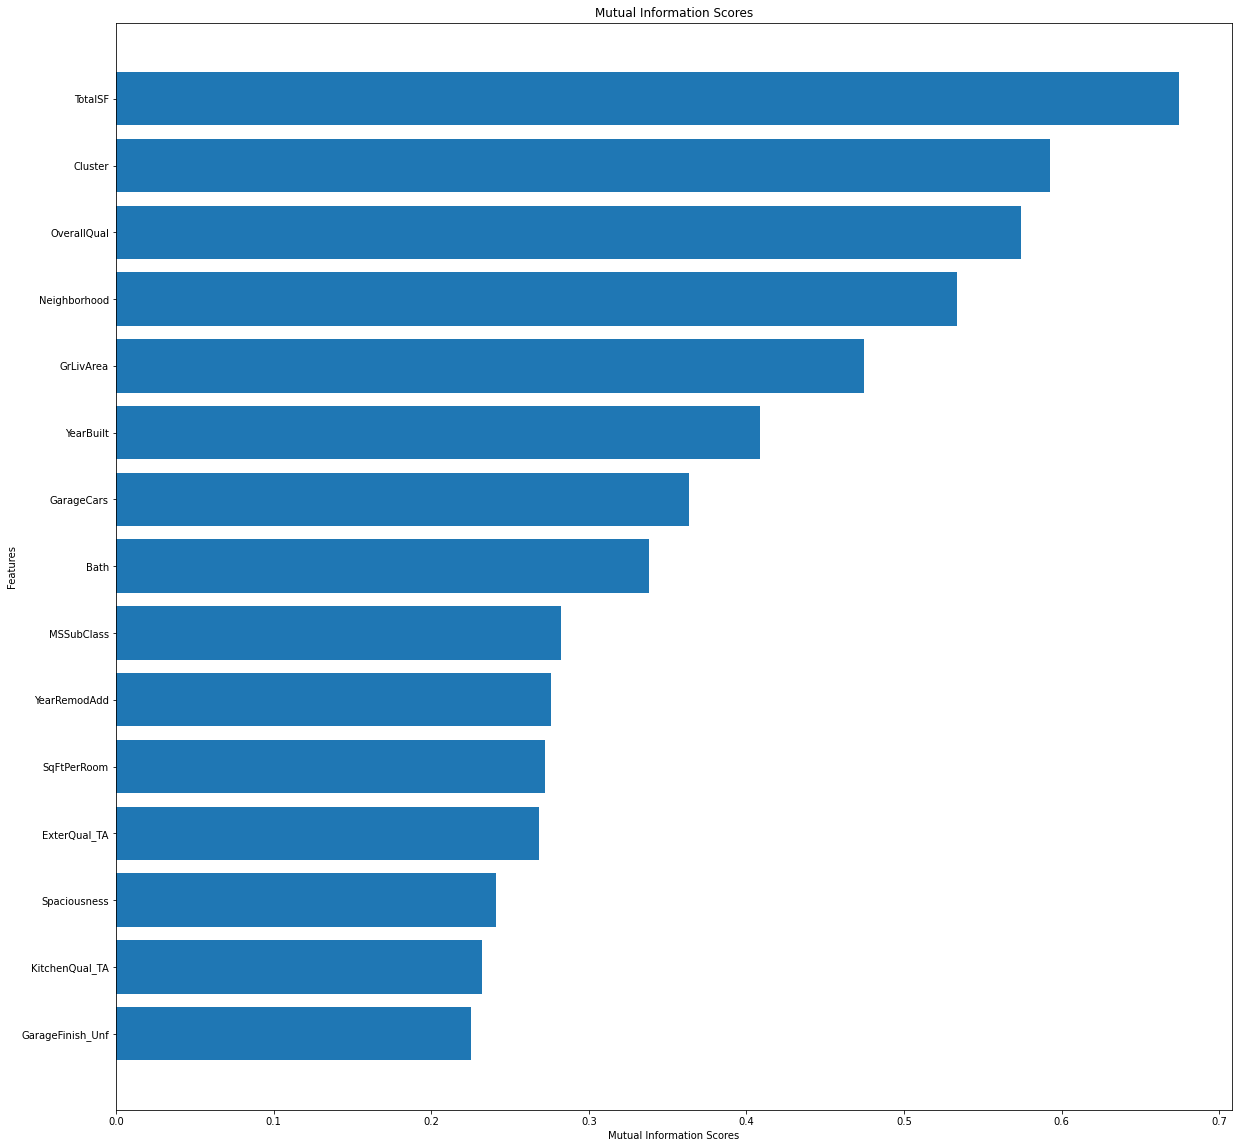

In [47]:
plt.figure(figsize=(20,20))
plt.ylabel("Features")
plt.xlabel("Mutual Information Scores")
plot_mi_scores(top_features)

* **These are the top 15 features according to the mutual information scores. Mutual information is a great way to see if a feature(categorical and numerical) impacts the target. It captures all types of relationship unlike correlation which captures only linear relationship. Hence mutual information can used for feature selection, features with scores equal to zero maybe dropped. But in my case I got a bit better results by keeping the unimportant variables than by dropping them. So I wont be dropping these variables.**

### Model Building

In [48]:
x_train,x_test,y_train,y_test=train_test_split(train_df.drop(['SalePrice'],axis=1),train_df['SalePrice'],train_size=0.8,random_state=2020)

In [49]:
cat=CatBoostRegressor(verbose=0)
param_grid_cat={"learning_rate":[0.03,0.05,0.07,0.1,0.15,0.2,0.25,0.3],"max_depth":[3,4,5,6],"n_estimators":[50,100,200,300,500,700,1000]
                          ,'l2_leaf_reg':[1,3,5,7,9]}

cat_grid=RandomizedSearchCV(cat,param_grid_cat,cv=10,verbose=0)
cat_grid.fit(x_train,y_train)
cat_grid.best_estimator_

In [50]:
cat_grid.best_estimator_

In [51]:
cat=cat_grid.best_estimator_

In [52]:
cat=CatBoostRegressor(l2_leaf_reg=5,learning_rate=0.03,max_depth=4,n_estimators=500)

In [53]:
cat.fit(x_train,y_train,verbose=0)
print('Test rmsle:',sqrt(mean_squared_log_error(np.exp(y_test),np.exp(cat.predict(x_test)))))
print('Train rmsle:',sqrt(mean_squared_log_error(np.exp(y_train),np.exp(cat.predict(x_train)))))

Test rmsle: 0.10350712293999684
Train rmsle: 0.0932976517586958


In [54]:
xgb=XGBRegressor(random_state=2020)
param_grid_xgb={"learning_rate":[0.1,0.15,0.2,0.25,0.3],"max_depth":[3,4,5,6],"n_estimators":[50,100,200,300,500,700,1000],'objective':['reg:squarederror'],
                          'min_child_weight':[1,2,3,4,5,6],'colsample_bytree':[0.3, 0.5, 0.7,1]
}
xgb_grid=RandomizedSearchCV(xgb,param_grid_xgb,cv=10)
xgb_grid.fit(x_train,y_train)
xgb_grid.best_estimator_

/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will gen

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=2, missing=nan, monotone_constraints='()',
             n_estimators=700, n_jobs=4, num_parallel_tree=1, random_state=2020,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [55]:
xgb=xgb_grid.best_estimator_
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=2, missing=nan, monotone_constraints='()',
             n_estimators=700, n_jobs=4, num_parallel_tree=1, random_state=2020,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [56]:
print("train :",sqrt(mean_squared_log_error(np.exp(xgb.predict(x_train)),np.exp(y_train))))
print("test : ",sqrt(mean_squared_log_error(np.exp(xgb.predict(x_test)),np.exp(y_test))))


train : 0.003154737987731443
test :  0.111493707918373


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


### Ridge,Lasso and ElasticNet

In [57]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import RidgeCV,LassoCV,ElasticNetCV
from sklearn.model_selection import KFold, cross_val_score

In [58]:
kfolds = KFold(n_splits=10, shuffle=True, random_state=42)
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

ridge = make_pipeline(RobustScaler(),
                      RidgeCV(alphas=alphas_alt, cv=kfolds,))

lasso = make_pipeline(RobustScaler(),
                      LassoCV(max_iter=1e7, alphas=alphas2,
                              random_state=42, cv=kfolds))

elasticnet = make_pipeline(RobustScaler(),
                           ElasticNetCV(max_iter=1e7, alphas=e_alphas,
                                        cv=kfolds, random_state=42, l1_ratio=e_l1ratio))

In [59]:
lasso.fit(x_train,y_train)
print("Lasso")
print("train :",sqrt(mean_squared_log_error(np.exp(lasso.predict(x_train)),np.exp(y_train))))
print("test : ",sqrt(mean_squared_log_error(np.exp(lasso.predict(x_test)),np.exp(y_test))))
print()

elasticnet.fit(x_train,y_train)
print("Elasticnet")
print("train :",sqrt(mean_squared_log_error(np.exp(elasticnet.predict(x_train)),np.exp(y_train))))
print("test : ",sqrt(mean_squared_log_error(np.exp(elasticnet.predict(x_test)),np.exp(y_test))))
print()

ridge.fit(x_train,y_train)
print("Ridge")
print("train :",sqrt(mean_squared_log_error(np.exp(ridge.predict(x_train)),np.exp(y_train))))
print("test : ",sqrt(mean_squared_log_error(np.exp(ridge.predict(x_test)),np.exp(y_test))))

Lasso
train : 0.10449146795640982
test :  0.10557888542068534

Elasticnet
train : 0.10449146795640982
test :  0.10557888542068534

Ridge
train : 0.10943186055742238
test :  0.10352350615391454


### LGBM

In [60]:
gridParams = {
     'learning_rate': [0.03, 0.05,0.07,0.1,0.15,0.2,0.25,0.3],
     'n_estimators': [200,500,1000],
     'num_leaves': [4,6,8],
    'max_depth': [2, 3, 4, 5, 6, 7],
    'colsample_bytree' : [0.3, 0.5,0.7, 1],
     'reg_alpha' : [1, 1.2, 1.4],
     'reg_lambda' : [1,1.2,1.4],
     }

lgb_estimator = LGBMRegressor()

grid_search_lgbm = RandomizedSearchCV(estimator=lgb_estimator, 
                            param_distributions=gridParams,
                            scoring='neg_mean_squared_error',
                            verbose = True,
                            n_jobs=-1,cv=10)

 # Finding the best parameters.

grid_search_lgbm.fit(x_train, y_train)
best_parameters_lgbm = grid_search_lgbm.best_params_  
print(best_parameters_lgbm)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
{'reg_lambda': 1, 'reg_alpha': 1, 'num_leaves': 6, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.05, 'colsample_bytree': 0.5}


In [61]:
grid_search_lgbm.best_estimator_

LGBMRegressor(colsample_bytree=0.5, learning_rate=0.05, max_depth=3,
              n_estimators=500, num_leaves=6, reg_alpha=1, reg_lambda=1)

In [62]:
lgbm=grid_search_lgbm.best_estimator_
lgbm.fit(x_train,y_train)
print("Train rmsle : ",sqrt(mean_squared_log_error(np.exp(lgbm.predict(x_train)),np.exp(y_train))))
print("Test rmsle : ",sqrt(mean_squared_log_error(np.exp(lgbm.predict(x_test)),np.exp(y_test))))

Train rmsle :  0.08781951036140531
Test rmsle :  0.10569950968729631


### GBR

In [63]:
param_grid_gbr = {
     'learning_rate': [0.03, 0.05,0.07,0.1,0.15,0.2,0.25,0.3],
     'n_estimators': [200,500,1000],
    'max_depth': [2, 3, 4, 5, 6, 7],
    'min_samples_leaf':[5,10,15,20],
    'min_samples_split':[5,10,15,20]
     }

gbr=GradientBoostingRegressor()
gbr_grid=RandomizedSearchCV(gbr,param_grid_gbr,cv=10)
gbr_grid.fit(x_train,y_train)
gbr_grid.best_params_

{'n_estimators': 1000,
 'min_samples_split': 5,
 'min_samples_leaf': 10,
 'max_depth': 2,
 'learning_rate': 0.03}

In [64]:
gbr = gbr_grid.best_estimator_
gbr.fit(x_train,y_train)

GradientBoostingRegressor(learning_rate=0.03, max_depth=2, min_samples_leaf=10,
                          min_samples_split=5, n_estimators=1000)

In [65]:
sqrt(mean_squared_log_error(np.exp(gbr.predict(x_test)),np.exp(y_test)))

0.1049195347778365

In [66]:
from mlxtend.regressor import StackingCVRegressor

In [67]:
stack_gen = StackingCVRegressor(regressors=(ridge, lasso,
                                            elasticnet, xgb, cat,lgbm,gbr),
                                meta_regressor=xgb,
                                use_features_in_secondary=True,)
stack_gen.fit(x_train,y_train)
print("Train rmsle:",sqrt(mean_squared_log_error(np.exp(stack_gen.predict(x_train)),np.exp(y_train))))
print("Test rmsle:",sqrt(mean_squared_log_error(np.exp(stack_gen.predict(x_test)),np.exp(y_test))))

0:	learn: 0.3965217	total: 2.04ms	remaining: 1.02s
1:	learn: 0.3903274	total: 3.96ms	remaining: 985ms
2:	learn: 0.3838362	total: 5.49ms	remaining: 909ms
3:	learn: 0.3763137	total: 7.03ms	remaining: 872ms
4:	learn: 0.3694988	total: 8.6ms	remaining: 852ms
5:	learn: 0.3635367	total: 10.2ms	remaining: 842ms
6:	learn: 0.3571936	total: 11.8ms	remaining: 831ms
7:	learn: 0.3516080	total: 13.6ms	remaining: 835ms
8:	learn: 0.3455903	total: 15.4ms	remaining: 839ms
9:	learn: 0.3399700	total: 17.1ms	remaining: 836ms
10:	learn: 0.3344670	total: 18.7ms	remaining: 831ms
11:	learn: 0.3294001	total: 20.2ms	remaining: 822ms
12:	learn: 0.3235916	total: 21.8ms	remaining: 815ms
13:	learn: 0.3179557	total: 23.5ms	remaining: 815ms
14:	learn: 0.3133065	total: 25.2ms	remaining: 814ms
15:	learn: 0.3084879	total: 26.7ms	remaining: 808ms
16:	learn: 0.3039605	total: 28.4ms	remaining: 807ms
17:	learn: 0.2997424	total: 30.1ms	remaining: 806ms
18:	learn: 0.2954859	total: 31.5ms	remaining: 798ms
19:	learn: 0.2917563	to

/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


Train rmsle: 0.036910708604502435
Test rmsle: 0.11234951805860356


In [68]:
def stacked_output(X):
    return ((0.15 * cat.predict(X)) +(0.15 * xgb.predict(X)) + (0.1 * ridge.predict(X))+(0.1 * lgbm.predict(X)) + (0.1 * elasticnet.predict(X))+ (0.3 * stack_gen.predict(X))+(0.1* lasso.predict(X)))            

In [69]:
preds=stacked_output(x_test)
print("Test rmsle:",sqrt(mean_squared_log_error(np.exp(preds),np.exp(y_test))))


Test rmsle: 0.10019156883722953


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


In [70]:

predictions=np.exp(stacked_output(test_df))
pred_df=pd.DataFrame(predictions,index=test_df["Id"],columns=['SalePrice'])
print(pred_df)
pred_df.to_csv("house price3.csv")

/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


          SalePrice
Id                 
1461  111512.336002
1462  151697.173321
1463  184529.681830
1464  188621.107483
1465  185890.142036
...             ...
2915   89373.602684
2916   85578.625445
2917  172530.093316
2918  122947.735060
2919  218607.043928

[1459 rows x 1 columns]
